<a href="https://colab.research.google.com/github/logantaylor19/MLB/blob/main/FineTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import os
import zipfile
from PIL import Image
import numpy as np

# Load the dataset
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
cats_dir = os.path.join(train_dir, 'cats')
dogs_dir = os.path.join(train_dir, 'dogs')

# Set parameters
NUMBER_OF_EXAMPLES = 1000  # Adjust as needed
IMG_SIZE = (150, 150)

x_train = []
y_train = []

# Load and resize images
for i in range(NUMBER_OF_EXAMPLES):
    if i % 2 == 0:
        img_path = os.path.join(cats_dir, os.listdir(cats_dir)[i])
        im = Image.open(img_path).convert("RGB")
        im_resized = im.resize(IMG_SIZE)
        x_train.append(np.array(im_resized))
        y_train.append(1)  # Label for cats
    else:
        img_path = os.path.join(dogs_dir, os.listdir(dogs_dir)[i])
        im = Image.open(img_path).convert("RGB")
        im_resized = im.resize(IMG_SIZE)
        x_train.append(np.array(im_resized))
        y_train.append(0)  # Label for dogs

# Convert to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

In [26]:
import tensorflow as tf

resnet_model = models.Sequential()

pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(150, 150, 3),
    pooling='avg',
    weights='imagenet'
)

for layer in pretrained_model.layers:
    layer.trainable = False

resnet_model.add(pretrained_model)
resnet_model.add(layers.Flatten())
resnet_model.add(layers.Dense(512, activation='relu'))
resnet_model.add(layers.Dense(1, activation='sigmoid'))

resnet_model.compile(optimizer=Adam(learning_rate=0.001),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

In [27]:
history = resnet_model.fit(
    x_train, y_train,
    epochs=10,  # Adjust epochs as needed
    batch_size=32,
    validation_split=0.2  # Use 20% of training data for validation
)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 109s 3s/step - accuracy: 0.8531 - loss: 0.3499 - val_accuracy: 0.9000 - val_loss: 0.4161
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.9348 - loss: 0.1764 - val_accuracy: 0.9500 - val_loss: 0.2157
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.9943 - loss: 0.0261 - val_accuracy: 0.9250 - val_loss: 0.2452
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 134s 3s/step - accuracy: 0.9991 - loss: 0.0159 - val_accuracy: 0.9350 - val_loss: 0.2087
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 0.9350 - val_loss: 0.2058
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.9200 - val_loss: 0.2063
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9200 - val_loss: 0.2104
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.9250 - val_lo

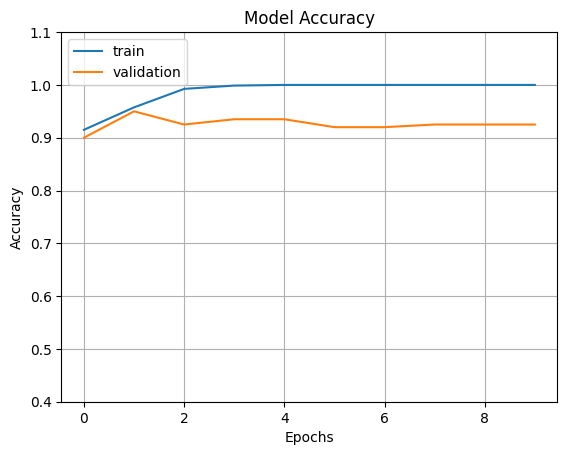

In [29]:
import matplotlib.pyplot as plt

fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1.1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

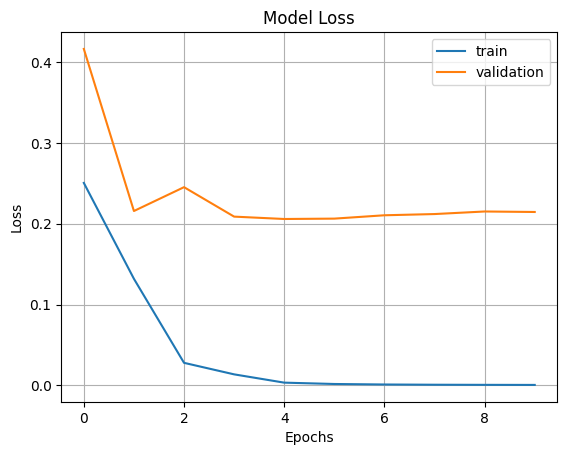

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show

In [34]:
predictions = resnet_model.predict(x_train[:10])
predicted_labels = (predictions > 0.5).astype(int)
for i in range(9):
    print(f"Image {i+1}: Predicted = {'Cat' if predicted_labels[i][0] == 1 else 'Dog'}, Actual = {'Cat' if y_train[i] == 1 else 'Dog'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Image 1: Predicted = Cat, Actual = Cat
Image 2: Predicted = Dog, Actual = Dog
Image 3: Predicted = Cat, Actual = Cat
Image 4: Predicted = Dog, Actual = Dog
Image 5: Predicted = Cat, Actual = Cat
Image 6: Predicted = Dog, Actual = Dog
Image 7: Predicted = Cat, Actual = Cat
Image 8: Predicted = Dog, Actual = Dog
Image 9: Predicted = Cat, Actual = Cat
